# Pretrained Models
It is possible to load pretrained models which is a powerful concept.

Model implementation:
https://keras.io/api/applications/#usage-examples-for-image-classification-models

Class list for ResNet50, for example tennis ball is 852:
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


In [32]:
model = ResNet50(weights='imagenet')

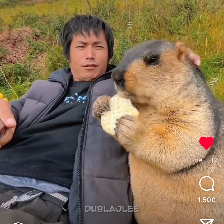

In [43]:
# img_path = 'zebra.jpg'
# img_path = 'linjal.jpg'
# img_path = '2h.jpeg'
# img_path = '1i.jpeg'
# img_path = 'incir.jpeg'
img = image.load_img(img_path, target_size=(224, 224), keep_aspect_ratio= True)
img

In [39]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [40]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [41]:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input
x = preprocess_input(x)

In [42]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

1/1 [==============================] - 0s 126ms/step
Predicted: [('n07753113', 'fig', 0.90020597), ('n07754684', 'jackfruit', 0.044906754), ('n07753592', 'banana', 0.021857686)]


# Try to take some pictures yourself and predict their class.

I took pictures of fig, a leaf and a marmot next to human.



**Analysis results**

**Fig:** Predicted: [('n07753113', '**fig', 0.90020597**), ('n07754684', 'jackfruit', 0.044906754), ('n07753592', 'banana', 0.021857686)]

**Leaf:** Predicted: [('n07684084', **'French_loaf', 0.24771565)**, ('n03775071', 'mitten', 0.14249282), ('n04525038', 'velvet', 0.08989313)]

**Seashell:** Predicted: [('n03804744', '**nail**', **0.86949205**), ('n03014705', 'chest', 0.032886997), ('n04153751', 'screw', 0.016564386)]


**Marmot& human: Predicted:** [('n02361337', '**marmot**', **0.6809597**), ('n02363005', 'beaver', 0.10974338), ('n01883070', 'wombat', 0.09238227)]



In [16]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [17]:
x = preprocess_input(x)

In [ ]:
preds = model.predict()

*I restarted Kernel changed the names of the files but pictures stayed exactly the same. Some even labelled- named wrong. Let see test 2 results!*


**Analysis results:**

**Fig: **Predicted: [('n07753113', **'fig'**, 0.90020597), ('n07754684', 'jackfruit', 0.044906754), ('n07753592', 'banana', 0.021857686)]

**Leaf:** Predicted: [('n07684084', **'French_loaf'**, 0.24771565), ('n03775071', 'mitten', 0.14249282), ('n04525038', 'velvet', 0.08989313)]


**Marmot§ human **Predicted: [('n02361337', '**marmot**', 0.6809597), ('n02363005', 'beaver', 0.10974338), ('n01883070', 'wombat', 0.09238227)]

# Results do not seem to variate even the label is something else. So irrelevant from the name of file.

In [44]:
import matplotlib.pyplot as plt
import numpy as np

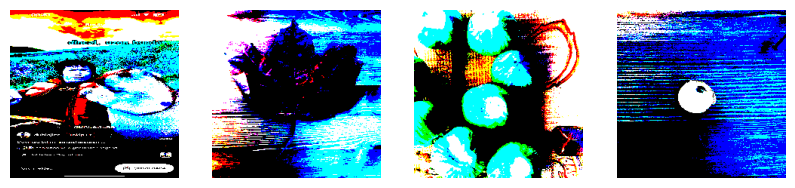

In [52]:
# Function Images used for analysis

def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array.squeeze()  # Remove singleton dimension

# Function to plot images
def plot_images(images):
    plt.figure(figsize=(10, 10))
    for i in range(4):
        plt.subplot(1, 4, i + 1)
        plt.imshow(images[i])
        plt.axis('off')


# List of image paths
image_paths = ['/content/djur.jpeg', '/content/fallleaf.jpeg', '/content/incir.jpeg', '/content/seashell.jpeg']
# Load and preprocess images

images = [load_and_preprocess_image(img_path) for img_path in image_paths]

plot_images(images)

In [ ]:
# How machine returned my pictures was very different in pixels. So its a great experiment actually.